# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [10]:
!pip install httplib2 qgrid ipywidgets
!pip install --upgrade google-api-python-client
!pip install --upgrade oauth2client
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2
!jupyter nbextension enable --py --sys-prefix qgrid
!jupyter nbextension enable --py widgetsnbextension

Requirement already up-to-date: google-api-python-client in /home/sofia/simulacion/lib/python3.5/site-packages (1.7.4)


Requirement already up-to-date: oauth2client in /home/sofia/simulacion/lib/python3.5/site-packages (4.1.2)
Requirement already up-to-date: google-auth in /home/sofia/simulacion/lib/python3.5/site-packages (1.5.1)
Requirement already up-to-date: google-auth-oauthlib in /home/sofia/simulacion/lib/python3.5/site-packages (0.2.0)
Requirement already up-to-date: google-auth-httplib2 in /home/sofia/simulacion/lib/python3.5/site-packages (0.0.3)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sofia/simulacion/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Enabling notebook extension qgrid/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
authentication succeeded
/?code=4/NQClZb2VyL_Eo0vEYIKwkvjoCOtHOGdfS3BX0WRB9mXpSyP5rTn1Uj6Cw_75_SixVd56FppNBvE_y35rFZPGaUw


,davida.marin@udea.edu.coDAVID ALEJANDRO MARÍN ALZATEgoogle id: 100532802635099902978


#### Segundo integrante:
Deiry Sofia Navas Muriel

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

El problema de regresión que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos, consulte: https://archive.ics.uci.edu/ml/datasets/Air+Quality). Ejecute la siguiente celda para cargar los datos.

In [4]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:,0:12]
Y = db[:,12]

#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 

Con la librería Numpy  utilizo la variable .shape, consiste en retornar las dimensiones de la matriz, en este caso las que acabo de porcionar, como resultado tenemos *9357 muestras*.

1.2 ¿Cuántas carácteristicas tiene el problema?:

La base de datos cuenta con *12 carácteristicas* 



<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

In [5]:
print(X.shape)
print(Y.shape)

(9357, 12)
(9357,)


In [6]:
print(np.size(X,0))
print(np.size(X,1))

9357
12


## Ejercicio 2

Analice los siguientes métodos a la luz de la teoría vista para los modelos de regresión polinomial múltiple. Una vez comprenda su funcionamiento, proceda a completar el código del método de gradiente descendente para el problema de regresión. En este método se le pide escribir el código de la regla de actualización de los parámetros del algorítmo de gradiente descedente: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

y además se pide graficar el error cuadrático 
medio (ECM) vs. las iteraciones del algorítmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

## Ejercicio 3

En este punto debe hacer uso de los métodos escritos en el punto anterior para realizar el proceso de modelamiento y simulación de los datos de cargados en el punto 1. Complete el código llamando a la función gradiente_descendente y pasandole los parámetros correspondientes. Debe obtener como salída el vector de parámetros W estimado y la gráfica del error cuadrático medio vs iteraciones.

In [79]:
from __future__ import division
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

    
#Gradiente descendente para regresión lineal múltiple
def gradiente_descendente(X,Y,eta):
     
    #X es la matriz de datos extendida. W es el vector de parámetros del modelo
    #Extendemos la matriz
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros aleatoriamente
    
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    
    for iter in range(iteraciones):
        error = ECM(regression(X,W),Y)
        ecms[iter] = error
        #Aquí debe completar el código con la regla de actualización de los parámetros W. Tenga en cuenta
        #los nombres de las variables ya creadas: W, X, Y

        for j in range(0, d):
            s = 0
            for i in range(0, N):
                s += ( np.dot(X[i,:],W) - Y[i] ) * X[i,j]
            
            W[j] = W[j] - eta*(s/N)
         
        print("Iteración: ",iter," ECM: ",ecms[iter])
        #if(iter % 10 == 0):
            #print("Iteración: ",iter," ECM: ",ecms[iter])
            
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.plot(ecms, color='green')
    plt.xlabel("Iteraciones")
    plt.ylabel("ECM")
    plt.xlim(0,iteraciones)
#    plt.ion()
    plt.show()
    
    return W
    
    
    

In [80]:
from numpy import random
import math

W1 = None

def main(grado, eta):
    N = np.size(X,0)

    # #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    # grado =  1
    X2 = potenciaPolinomio(X,grado)

    #Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
    random.seed(1)
    ind = np.random.permutation(N)
    Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    #Xtrain = stats.stats.zscore(Xtrain)
    #Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    #eta = 1e-5

    #Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
    W = gradiente_descendente(Xtrain, Ytrain, eta)
    W1 = W

    #Evaluamos las predicciones del modelo con los datos de test
    unos = np.array([np.ones(np.size(Xtest,0))])
    Xtest = np.concatenate((unos.T, Xtest), axis=1)
    Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
    Yest = regression(Xtest, W)
    Error = ECM(Yest,Ytest)
    print ('\nError durante la prueba = ' + str(Error))
    


Vector de parámetros del modelo:

[[-0.03558286]
 [-0.007918  ]
 [ 0.15133842]
 [ 0.00093364]
 [ 0.1928634 ]
 [ 0.12758654]
 [-0.01766559]
 [ 0.12402929]
 [-0.0109535 ]
 [ 0.13628699]
 [ 0.10329179]
 [ 0.1922855 ]
 [ 0.18535403]]

Error Final durante el entrenamiento = 774.0552893900309


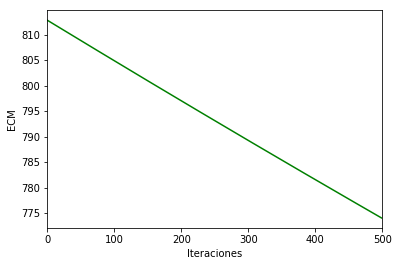


Error durante la prueba = 703.3760212663899


In [76]:
main(1,1e-5)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  811.4469697702392
Iteración:  20  ECM:  810.0951292734733
Iteración:  30  ECM:  808.7457933749446
Iteración:  40  ECM:  807.398957235213
Iteración:  50  ECM:  806.0546160243932
Iteración:  60  ECM:  804.7127649221381
Iteración:  70  ECM:  803.3733991176177
Iteración:  80  ECM:  802.0365138095015
Iteración:  90  ECM:  800.7021042059384
Iteración:  100  ECM:  799.3701655245392
Iteración:  110  ECM:  798.0406929923562
Iteración:  120  ECM:  796.7136818458649
Iteración:  130  ECM:  795.3891273309459
Iteración:  140  ECM:  794.0670247028648
Iteración:  150  ECM:  792.7473692262547
Iteración:  160  ECM:  791.430156175096
Iteración:  170  ECM:  790.1153808326997
Iteración:  180  ECM:  788.803038491687
Iteración:  190  ECM:  787.4931244539711
Iteración:  200  ECM:  786.18563403074
Iteración:  210  ECM:  784.8805625424359
Iteración:  220  ECM:  783.5779053187379
Iteración:  230  ECM:  782.2776576985436
Iteración:  240  ECM:  780.97981

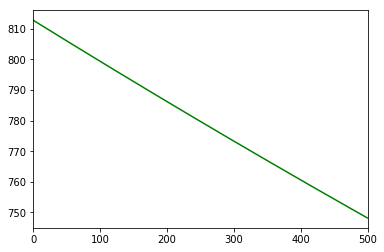


Error durante la prueba = 709.8818828072049


In [30]:
main(2,1e-5)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  810.9303437653248
Iteración:  20  ECM:  809.064114152571
Iteración:  30  ECM:  807.2026183101922
Iteración:  40  ECM:  805.3458437065285
Iteración:  50  ECM:  803.4937778439705
Iteración:  60  ECM:  801.6464082588643
Iteración:  70  ECM:  799.8037225214193
Iteración:  80  ECM:  797.9657082356129
Iteración:  90  ECM:  796.1323530390991
Iteración:  100  ECM:  794.303644603114
Iteración:  110  ECM:  792.4795706323835
Iteración:  120  ECM:  790.6601188650312
Iteración:  130  ECM:  788.8452770724857
Iteración:  140  ECM:  787.0350330593885
Iteración:  150  ECM:  785.2293746635029
Iteración:  160  ECM:  783.4282897556218
Iteración:  170  ECM:  781.6317662394772
Iteración:  180  ECM:  779.8397920516486
Iteración:  190  ECM:  778.0523551614725
Iteración:  200  ECM:  776.269443570952
Iteración:  210  ECM:  774.4910453146671
Iteración:  220  ECM:  772.7171484596836
Iteración:  230  ECM:  770.9477411054644
Iteración:  240  ECM:  769.182

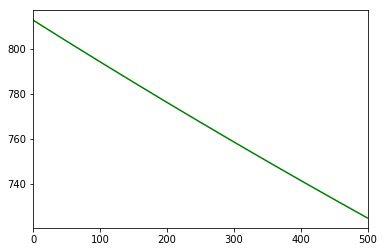


Error durante la prueba = 709.8473166611931


In [31]:
main(3,1e-5)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  810.4347134919493
Iteración:  20  ECM:  808.0756269328967
Iteración:  30  ECM:  805.7240351750861
Iteración:  40  ECM:  803.3799134409192
Iteración:  50  ECM:  801.0432370369233
Iteración:  60  ECM:  798.7139813534599
Iteración:  70  ECM:  796.3921218644351
Iteración:  80  ECM:  794.0776341270108
Iteración:  90  ECM:  791.7704937813158
Iteración:  100  ECM:  789.4706765501606
Iteración:  110  ECM:  787.1781582387503
Iteración:  120  ECM:  784.8929147343998
Iteración:  130  ECM:  782.6149220062508
Iteración:  140  ECM:  780.3441561049877
Iteración:  150  ECM:  778.0805931625566
Iteración:  160  ECM:  775.8242093918847
Iteración:  170  ECM:  773.5749810865988
Iteración:  180  ECM:  771.332884620748
Iteración:  190  ECM:  769.0978964485255
Iteración:  200  ECM:  766.8699931039906
Iteración:  210  ECM:  764.6491512007934
Iteración:  220  ECM:  762.4353474319001
Iteración:  230  ECM:  760.2285585693181
Iteración:  240  ECM:  758.0

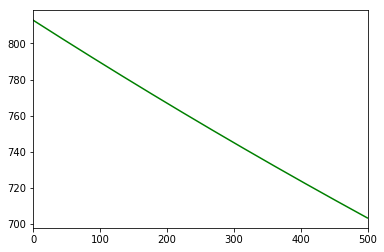


Error durante la prueba = 711.3701531480207


In [32]:
main(4,1e-5)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  809.9481817946433
Iteración:  20  ECM:  807.1058770999593
Iteración:  30  ECM:  804.2743630287458
Iteración:  40  ECM:  801.453597151272
Iteración:  50  ECM:  798.6435372088329
Iteración:  60  ECM:  795.8441411130474
Iteración:  70  ECM:  793.055366945159
Iteración:  80  ECM:  790.2771729553389
Iteración:  90  ECM:  787.5095175619939
Iteración:  100  ECM:  784.7523593510762
Iteración:  110  ECM:  782.0056570753937
Iteración:  120  ECM:  779.2693696539283
Iteración:  130  ECM:  776.5434561711515
Iteración:  140  ECM:  773.8278758763473
Iteración:  150  ECM:  771.1225881829351
Iteración:  160  ECM:  768.4275526677962
Iteración:  170  ECM:  765.7427290706037
Iteración:  180  ECM:  763.0680772931549
Iteración:  190  ECM:  760.4035573987055
Iteración:  200  ECM:  757.7491296113086
Iteración:  210  ECM:  755.104754315154
Iteración:  220  ECM:  752.4703920539122
Iteración:  230  ECM:  749.8460035300798
Iteración:  240  ECM:  747.231

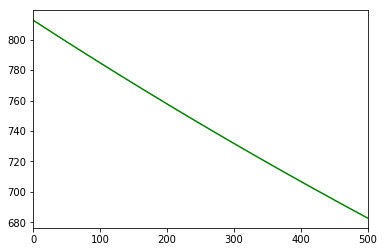


Error durante la prueba = 711.4026416401626


In [33]:
main(5,1e-5)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  737.2006114919222
Iteración:  20  ECM:  669.46591009403
Iteración:  30  ECM:  608.7532171201887
Iteración:  40  ECM:  554.3100710488246
Iteración:  50  ECM:  505.4655763680296
Iteración:  60  ECM:  461.62152091388435
Iteración:  70  ECM:  422.2444625413071
Iteración:  80  ECM:  386.8586792441415
Iteración:  90  ECM:  355.03988841271615
Iteración:  100  ECM:  326.40965122371955
Iteración:  110  ECM:  300.6303873372271
Iteración:  120  ECM:  277.40093325227
Iteración:  130  ECM:  256.45258495512803
Iteración:  140  ECM:  237.5455719812843
Iteración:  150  ECM:  220.4659157897147
Iteración:  160  ECM:  205.02263049441177
Iteración:  170  ECM:  191.04522858179473
Iteración:  180  ECM:  178.38149832542808
Iteración:  190  ECM:  166.89552324602033
Iteración:  200  ECM:  156.46591720378512
Iteración:  210  ECM:  146.98425159536285
Iteración:  220  ECM:  138.35365369731898
Iteración:  230  ECM:  130.4875574872201
Iteración:  240  ECM

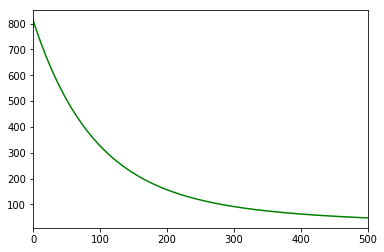


Error durante la prueba = 432.36244848825163


In [34]:
main(1,1e-3)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  688.9843785390716
Iteración:  20  ECM:  585.9817334201
Iteración:  30  ECM:  500.1531788940518
Iteración:  40  ECM:  428.5087406791236
Iteración:  50  ECM:  368.5911211704999
Iteración:  60  ECM:  318.3795446188786
Iteración:  70  ECM:  276.211091009665
Iteración:  80  ECM:  240.7163240299199
Iteración:  90  ECM:  210.76660349634506
Iteración:  100  ECM:  185.43095033376088
Iteración:  110  ECM:  163.94072232553134
Iteración:  120  ECM:  145.66067747677164
Iteración:  130  ECM:  130.0652620589204
Iteración:  140  ECM:  116.71917295267072
Iteración:  150  ECM:  105.261417521217
Iteración:  160  ECM:  95.39223606787071
Iteración:  170  ECM:  86.86236779135666
Iteración:  180  ECM:  79.4642358086366
Iteración:  190  ECM:  73.02470415554156
Iteración:  200  ECM:  67.39912287334201
Iteración:  210  ECM:  62.46642893594194
Iteración:  220  ECM:  58.125112983619026
Iteración:  230  ECM:  54.28989633302903
Iteración:  240  ECM:  50.8

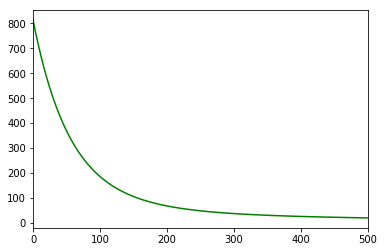


Error durante la prueba = 666.8547928838403


In [35]:
main(2,1e-3)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  647.2209801765297
Iteración:  20  ECM:  518.4308979709775
Iteración:  30  ECM:  417.94100570263396
Iteración:  40  ECM:  339.26768162869365
Iteración:  50  ECM:  277.4519626290719
Iteración:  60  ECM:  228.69467612546867
Iteración:  70  ECM:  190.07991872248076
Iteración:  80  ECM:  159.36532354494054
Iteración:  90  ECM:  134.822845452517
Iteración:  100  ECM:  115.117779542776
Iteración:  110  ECM:  99.21673440595475
Iteración:  120  ECM:  86.31754905604579
Iteración:  130  ECM:  75.79585328545515
Iteración:  140  ECM:  67.1642624263911
Iteración:  150  ECM:  60.04117239507594
Iteración:  160  ECM:  54.126857230565385
Iteración:  170  ECM:  49.18512773207679
Iteración:  180  ECM:  45.02923042149064
Iteración:  190  ECM:  41.510984209046605
Iteración:  200  ECM:  38.51239292486734
Iteración:  210  ECM:  35.93915422849169
Iteración:  220  ECM:  33.715623603242946
Iteración:  230  ECM:  31.780896956557186
Iteración:  240  ECM:

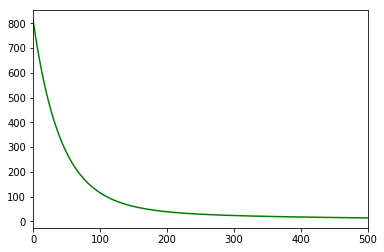


Error durante la prueba = 715.0872818014203


In [36]:
main(3,1e-3)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  609.5670106940489
Iteración:  20  ECM:  461.1379959332145
Iteración:  30  ECM:  352.23616212786766
Iteración:  40  ECM:  271.94092556711655
Iteración:  50  ECM:  212.42546439119562
Iteración:  60  ECM:  168.0639225273236
Iteración:  70  ECM:  134.79975025614655
Iteración:  80  ECM:  109.69806153917656
Iteración:  90  ECM:  90.62781836964699
Iteración:  100  ECM:  76.03573254933201
Iteración:  110  ECM:  64.78505839993768
Iteración:  120  ECM:  56.04037230694687
Iteración:  130  ECM:  49.18500184108797
Iteración:  140  ECM:  43.761682179479116
Iteración:  150  ECM:  39.42977343615425
Iteración:  160  ECM:  35.93431454505083
Iteración:  170  ECM:  33.08355949535384
Iteración:  180  ECM:  30.73260969175699
Iteración:  190  ECM:  28.77144107155988
Iteración:  200  ECM:  27.1161099625986
Iteración:  210  ECM:  25.702266259173317
Iteración:  220  ECM:  24.48034764369061
Iteración:  230  ECM:  23.412003374064728
Iteración:  240  ECM

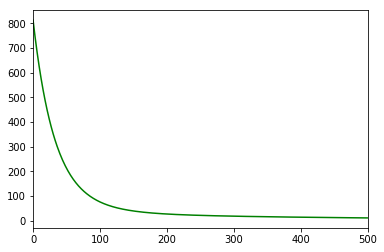


Error durante la prueba = 716.556641617758


In [37]:
main(4,1e-3)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  574.7494494469591
Iteración:  20  ECM:  411.20442190478485
Iteración:  30  ECM:  298.19113201363757
Iteración:  40  ECM:  219.60470396887828
Iteración:  50  ECM:  164.58670451969718
Iteración:  60  ECM:  125.78655189668208
Iteración:  70  ECM:  98.20677329056245
Iteración:  80  ECM:  78.43404437254948
Iteración:  90  ECM:  64.12565142117208
Iteración:  100  ECM:  53.665447498725136
Iteración:  110  ECM:  45.93256388567163
Iteración:  120  ECM:  40.14533957911577
Iteración:  130  ECM:  35.75558131507202
Iteración:  140  ECM:  32.37661366956074
Iteración:  150  ECM:  29.734096978701537
Iteración:  160  ECM:  27.63224640968852
Iteración:  170  ECM:  25.930512814279794
Iteración:  180  ECM:  24.527401857760484
Iteración:  190  ECM:  23.34918665510123
Iteración:  200  ECM:  22.34199155176037
Iteración:  210  ECM:  21.466210112296732
Iteración:  220  ECM:  20.692547770212503
Iteración:  230  ECM:  19.999201275609543
Iteración:  240

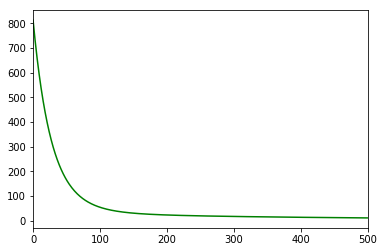


Error durante la prueba = 711.366445864058


In [38]:
main(5,1e-3)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  20.639392437103883
Iteración:  20  ECM:  10.908406493679093
Iteración:  30  ECM:  8.555752524244765
Iteración:  40  ECM:  7.183860447326638
Iteración:  50  ECM:  6.147643760502596
Iteración:  60  ECM:  5.320714691571255
Iteración:  70  ECM:  4.648338577447069
Iteración:  80  ECM:  4.095794581665607
Iteración:  90  ECM:  3.638238073499082
Iteración:  100  ECM:  3.2569975994644986
Iteración:  110  ECM:  2.937648318299382
Iteración:  120  ECM:  2.6688464872470123
Iteración:  130  ECM:  2.4415630359517606
Iteración:  140  ECM:  2.2485490829921195
Iteración:  150  ECM:  2.0839468514527777
Iteración:  160  ECM:  1.9429976788717314
Iteración:  170  ECM:  1.8218182401879224
Iteración:  180  ECM:  1.7172265542854364
Iteración:  190  ECM:  1.626605325283671
Iteración:  200  ECM:  1.547793817227758
Iteración:  210  ECM:  1.479001823934198
Iteración:  220  ECM:  1.4187409081672049
Iteración:  230  ECM:  1.3657692305315885
Iteración:  240

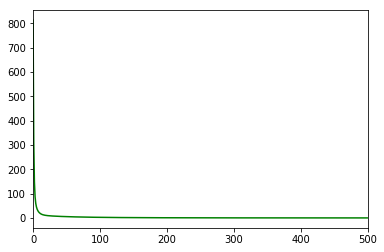


Error durante la prueba = 1337.748463633197


In [39]:
main(1,1e-1)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  7.623626798724326
Iteración:  20  ECM:  2.1034461681062395
Iteración:  30  ECM:  0.957731307508036
Iteración:  40  ECM:  0.620768081384839
Iteración:  50  ECM:  0.48636180643309934
Iteración:  60  ECM:  0.4179313764756619
Iteración:  70  ECM:  0.37632382222386485
Iteración:  80  ECM:  0.3477430590706475
Iteración:  90  ECM:  0.3263937628449475
Iteración:  100  ECM:  0.30946250959937377
Iteración:  110  ECM:  0.295424618650897
Iteración:  120  ECM:  0.28338602409964186
Iteración:  130  ECM:  0.2727917524817856
Iteración:  140  ECM:  0.2632818575907259
Iteración:  150  ECM:  0.2546141411920419
Iteración:  160  ECM:  0.24662022800250802
Iteración:  170  ECM:  0.2391795382945439
Iteración:  180  ECM:  0.2322033561423045
Iteración:  190  ECM:  0.22562479871725685
Iteración:  200  ECM:  0.219392331857636
Iteración:  210  ECM:  0.21346546909171218
Iteración:  220  ECM:  0.20781184659518562
Iteración:  230  ECM:  0.20240518566896398


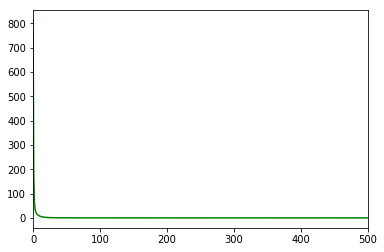


Error durante la prueba = 845.31989761889


In [40]:
main(2,1e-1)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  4.885352030032771
Iteración:  20  ECM:  1.1894959400965481
Iteración:  30  ECM:  0.681078664950592
Iteración:  40  ECM:  0.5602410520998174
Iteración:  50  ECM:  0.4988450749000024
Iteración:  60  ECM:  0.4528567597808626
Iteración:  70  ECM:  0.41445497724484015
Iteración:  80  ECM:  0.38132030451657795
Iteración:  90  ECM:  0.3522985655027072
Iteración:  100  ECM:  0.3266307654519623
Iteración:  110  ECM:  0.3037582603762945
Iteración:  120  ECM:  0.283249245552808
Iteración:  130  ECM:  0.2647609264187813
Iteración:  140  ECM:  0.248016189705908
Iteración:  150  ECM:  0.23278781808783933
Iteración:  160  ECM:  0.21888727916853298
Iteración:  170  ECM:  0.20615652999042344
Iteración:  180  ECM:  0.19446190061128157
Iteración:  190  ECM:  0.18368944999123688
Iteración:  200  ECM:  0.1737413847402118
Iteración:  210  ECM:  0.16453325778754463
Iteración:  220  ECM:  0.15599174817574435
Iteración:  230  ECM:  0.1480528803047585

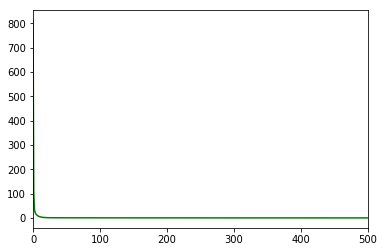


Error durante la prueba = 685.3369170531051


In [41]:
main(3,1e-1)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  4.325544930634607
Iteración:  20  ECM:  1.1687755973486562
Iteración:  30  ECM:  0.676544676266348
Iteración:  40  ECM:  0.5294471922383823
Iteración:  50  ECM:  0.4459367519315269
Iteración:  60  ECM:  0.3847469488177794
Iteración:  70  ECM:  0.3364944575122514
Iteración:  80  ECM:  0.29723839067240454
Iteración:  90  ECM:  0.2646318400698633
Iteración:  100  ECM:  0.23710485182249147
Iteración:  110  ECM:  0.2135591785728244
Iteración:  120  ECM:  0.1932041661407289
Iteración:  130  ECM:  0.1754561670230756
Iteración:  140  ECM:  0.1598740270942195
Iteración:  150  ECM:  0.14611674075751382
Iteración:  160  ECM:  0.13391516228022798
Iteración:  170  ECM:  0.12305279343007404
Iteración:  180  ECM:  0.1133525170888587
Iteración:  190  ECM:  0.10466727864056063
Iteración:  200  ECM:  0.09687342355666285
Iteración:  210  ECM:  0.08986584672502178
Iteración:  220  ECM:  0.08355439521118226
Iteración:  230  ECM:  0.07786115115470

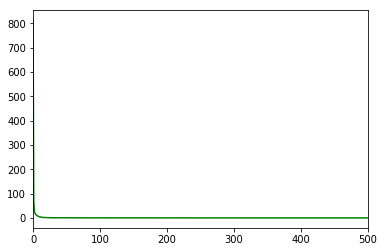


Error durante la prueba = 674.363615996056


In [42]:
main(4,1e-1)

Iteración:  0  ECM:  812.8013197142589
Iteración:  10  ECM:  4.274086104936586
Iteración:  20  ECM:  1.1363518869408102
Iteración:  30  ECM:  0.6073067195071861
Iteración:  40  ECM:  0.44497557250966924
Iteración:  50  ECM:  0.3565467437794255
Iteración:  60  ECM:  0.2950353480352279
Iteración:  70  ECM:  0.24868892739623163
Iteración:  80  ECM:  0.21256068849707246
Iteración:  90  ECM:  0.18382637138820193
Iteración:  100  ECM:  0.160645241751731
Iteración:  110  ECM:  0.14173553979500242
Iteración:  120  ECM:  0.126167605335218
Iteración:  130  ECM:  0.11324804867340091
Iteración:  140  ECM:  0.10244914281164322
Iteración:  150  ECM:  0.09336304925928783
Iteración:  160  ECM:  0.08567073064436977
Iteración:  170  ECM:  0.07912008962309565
Iteración:  180  ECM:  0.07351019218214952
Iteración:  190  ECM:  0.06867965723796654
Iteración:  200  ECM:  0.06449798134517581
Iteración:  210  ECM:  0.06085897584804362
Iteración:  220  ECM:  0.057675749542159635
Iteración:  230  ECM:  0.05487683

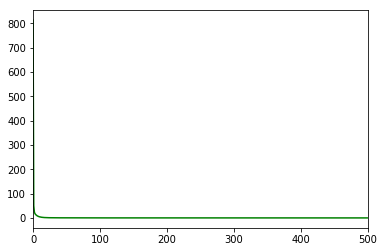


Error durante la prueba = 679.1952705182399


In [44]:
main(5,1e-1)

#### Responda:

3.1 Cuál es el número de coeficientes w que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:
    el numero de coeficientes que se obtiene porque nuestro conjunto de datos tiene $12$ variables, lo que resulta un polinomio de $12 \cdot 4 + 1 = 49$ donde $4$ es el grado del polinomio y el $1$ es la fila de unos que se le agrega para referirnos al termino indepdiente.


In [45]:
np.shape(W1)

()


3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?: Está incompleta porque no se está considerando el termino del polinomio cuando $x^0$ que seria un vector columna de unos.

## Ejercicio 4

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [58]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [59]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento ECM_Prueba
Tasa de aprendizaje Grado del polinomio                             
1e-5                1                             774.055    703.376
                    2                             748.189    709.882
                    3                             724.993    709.847
                    4                             703.416    711.370
                    5                             682.854    711.403
1e-3                1                              47.410    432.362
                    2                              19.415     66.555
                    3                              13.542    715.087
                    4                              11.354    716.557
                    5                              10.491    711.366
1e-1                1                               0.923   1337.748
                    2                               0.110    845.319
                    3                               0.048    685.336
                    4                               0.025    674.364
                    5                               0.028    679.195

## Ejercicio 4

En la celda de código del ejercicio 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferntes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

4.1 Qué sucede con los valores del ECM?


Al analizar la fórmula que corresponde al ECM. $$ECM = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}-Y)^2$$ Observamos que si el valor obtenido a partir del modelo está muy lejano al valor real, esta diferencia al elevarse al cuadrado es un número  grande, y más aún si se realiza la sumatoria, va a ser más grande. Es por esto, que la variable que aloja el error sufre un desbordamiento. Dicho desbordamiento se debe a que la cantidad de bytes que ocupa ese tipo de dato sobrepasa el limite de almacenamiento.


In [81]:
# para estos pasas comentamos la normalizacion del contunto de pruebas
main(1,1e-3)

Iteración:  0  ECM:  812.8013197142589
Iteración:  1  ECM:  1.76989857531679e+37
Iteración:  2  ECM:  1.3149685047722269e+69
Iteración:  3  ECM:  9.769724619599036e+100
Iteración:  4  ECM:  7.258540322174516e+132
Iteración:  5  ECM:  5.392824225868795e+164
Iteración:  6  ECM:  4.006666883459573e+196
Iteración:  7  ECM:  2.9768037752846753e+228
Iteración:  8  ECM:  2.211653969320788e+260
Iteración:  9  ECM:  1.6431762552257336e+292


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  10  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  11  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  12  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  13  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  14  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  15  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  16  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


Iteración:  17  ECM:  inf


C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in add
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in add


Iteración:  18  ECM:  inf
Iteración:  19  ECM:  nan
Iteración:  20  ECM:  nan
Iteración:  21  ECM:  nan
Iteración:  22  ECM:  nan
Iteración:  23  ECM:  nan
Iteración:  24  ECM:  nan
Iteración:  25  ECM:  nan
Iteración:  26  ECM:  nan
Iteración:  27  ECM:  nan
Iteración:  28  ECM:  nan
Iteración:  29  ECM:  nan
Iteración:  30  ECM:  nan
Iteración:  31  ECM:  nan


KeyboardInterrupt: 

In [82]:
main(5,1e-5)

C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simu

C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simu

Iteración:  0  ECM:  812.8013197142589
Iteración:  1  ECM:  nan
Iteración:  2  ECM:  nan
Iteración:  3  ECM:  nan
Iteración:  4  ECM:  nan
Iteración:  5  ECM:  nan
Iteración:  6  ECM:  nan
Iteración:  7  ECM:  nan


KeyboardInterrupt: 

In [83]:
main(5,1e-1)

C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simu

C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simulacionPY36\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda2\envs\simu

Iteración:  0  ECM:  812.8013197142589
Iteración:  1  ECM:  nan
Iteración:  2  ECM:  nan
Iteración:  3  ECM:  nan


KeyboardInterrupt: 


4.2 A qué se debe lo que observa?


Como ya sabemos el conjunto de entrada no está normalizada, por tanto no hay valores estándar que me permita tratarlos igual. Es un requisito común porque el algoritmo puede comportarse mal, tal como fue nuestro caso, nos indica que hay un desbordamiento que se presume que las características individuales no se parece entre ellas.


4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n log&iacute;stica y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?


La normalización sobre los datos, es la encargada de estandarizar los datos para que tenga las mismas proporciones y se permita evaluar en el modelo. En especial  es sensible el algoritmo de gradiente descendente al escalado de las variables para que estén en un rango definido. En el modelo de regresión logística es necesario para tener un $\eta$ que se ajuste a los saltos realizados en la función. 
Entre los tipos de normalización más comunes se encuentra T del estudiante, la normalización residual, momento estandarizado.
En este labororatorio se aplicó e escaldo de variables (Feature Scaling) donde se resta se obtiene el maximo y minimo de la $X$, de la siguiente forma $$X_{normalizado} = \frac{X - X_{min}}{X_{max} - X_{min}}$$